# Week 5_Day 4 : MNIST Classification

## CONCEPT 1: torchvision.datasets 

### Load MNIST 

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

### Defining Transform

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

### Download Dataset

In [3]:
train_dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root="data", train=False, download=True, transform=transform)

len(train_dataset), len(test_dataset)

100.0%
100.0%
100.0%
100.0%


(60000, 10000)

## CONCEPT 2: Train vs Validation Split

In [4]:
train_size = 50000
val_size = len(train_dataset) - train_size

train_data, val_data = random_split(train_dataset, [train_size, val_size])

len(train_data), len(val_data)

(50000, 10000)

## CONCEPT 3: DataLoader

In [5]:
batch_size = 64

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## CONCEPT 4: Build a simple neural network (Fully Connected NN)

### Define the Model

In [6]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),            # (batch, 1, 28, 28) -> (batch, 784)
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10)       # 10 classes: 0-9
        )
        
    def forward(self, x):
        return self.model(x)

model = SimpleNN()
model

SimpleNN(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

## CONCEPT 5: Loss + Optimizer

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## CONCEPT 6: Training loop with validation

In [8]:
def evaluate(model, dataloader):
    model.eval()
    total_correct = 0
    total_samples = 0
    total_loss = 0.0

    with torch.no_grad():
        for images, labels in dataloader:
            logits = model(images)
            loss = criterion(logits, labels)

            preds = torch.argmax(logits, dim=1)
            total_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
            total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy

In [9]:
epochs = 3  # start small, MNIST trains fast
train_losses = []
val_losses = []
val_accs = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        # forward
        logits = model(images)
        loss = criterion(logits, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    val_loss, val_acc = evaluate(model, val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc*100:.2f}%")

Epoch 1/3 | Train Loss: 0.2701 | Val Loss: 0.1523 | Val Acc: 95.55%
Epoch 2/3 | Train Loss: 0.1200 | Val Loss: 0.1257 | Val Acc: 95.97%
Epoch 3/3 | Train Loss: 0.0838 | Val Loss: 0.0959 | Val Acc: 96.92%


## CONCEPT 7: Final Test Accuracy

In [10]:
test_loss, test_acc = evaluate(model, test_loader)
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc*100:.2f}%")

Test Loss: 0.0908 | Test Accuracy: 97.27%


### MINI REAL-WORLD TASK

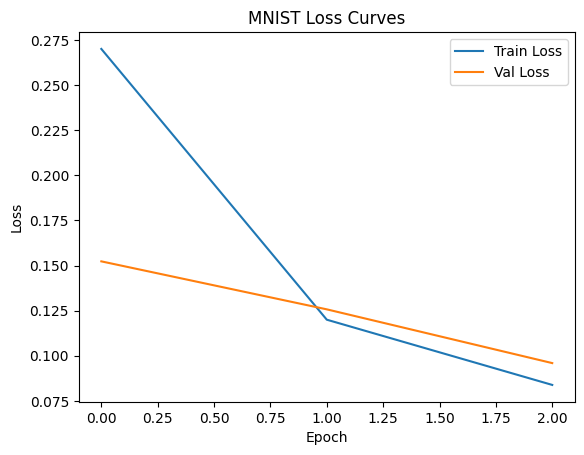

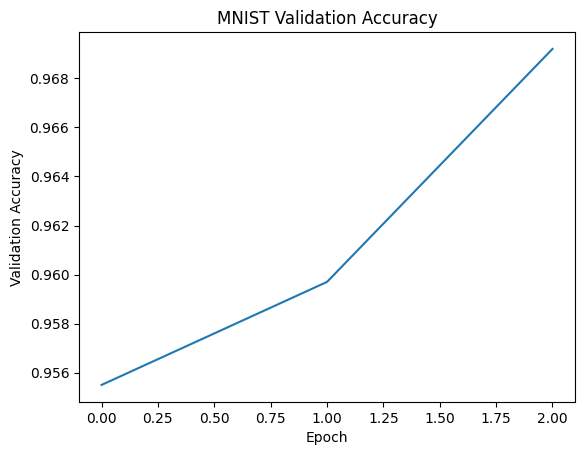

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MNIST Loss Curves")
plt.legend()
plt.show()

plt.plot(val_accs)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("MNIST Validation Accuracy")
plt.show()